In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df_clust = joblib.load('salidas/df_WithTarget.pkl')
df_clust.head()

,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,YearsAtCurrentAddress,...,HomeOwnership_Own,HomeOwnership_Rent,Education_Bachelor,Education_High School,Education_Masters,Education_PhD,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed
0,0.153005,0.016528,0.099691,0.028169,0.000000,0.105263,0.860918,0.473684,0.965517,0.620690,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.393443,0.138818,0.016119,0.394366,0.555556,0.421053,0.325016,0.684211,0.000000,0.310345,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.615665,0.391192,0.591818,0.873239,0.555556,0.368421,0.047852,0.315789,0.862069,0.310345,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.114754,0.463579,0.108542,0.507042,1.000000,0.000000,0.965361,0.263158,0.758621,0.103448,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.918033,0.504890,0.102869,0.760563,0.111111,0.526316,0.364656,0.947368,0.655172,0.172414,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [4]:
df_clust = df_clust.drop(columns=['NoPaidPerc'])

In [9]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clust)

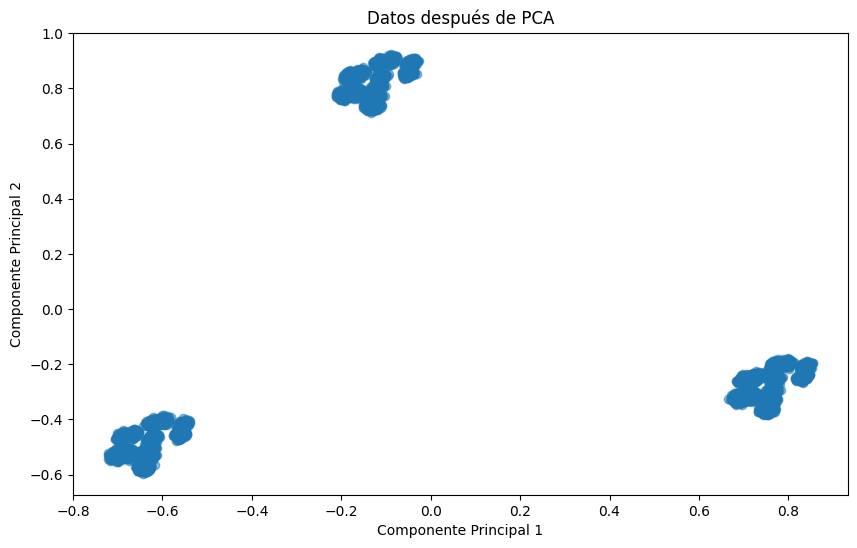

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
plt.title("Datos después de PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

In [11]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

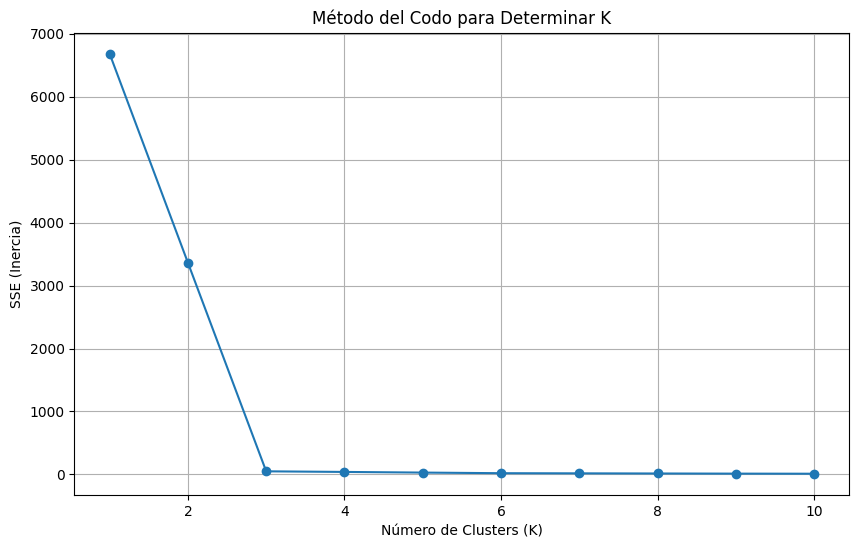

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title("Método del Codo para Determinar K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("SSE (Inercia)")
plt.grid()
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [14]:
silhouette_avg = silhouette_score(df_pca, kmeans.labels_)
print(f"Coeficiente de Silueta para KMeans: {silhouette_avg:.2f}")

Coeficiente de Silueta para KMeans: 0.94


In [15]:
sse_value = kmeans.inertia_
centroids = kmeans.cluster_centers_
iterations = kmeans.n_iter_
labels = kmeans.labels_

In [16]:
print(f"SSE Más Bajo: {sse_value}")
print(f"Coordenadas de los Centroides:\n{centroids}")
print(f"Número de Iteraciones para Converger: {iterations}")

SSE Más Bajo: 49.395339178315275
Coordenadas de los Centroides:
[[-0.64318268 -0.49560472]
 [ 0.75219602 -0.28456201]
 [-0.13143826  0.8172997 ]]
Número de Iteraciones para Converger: 2


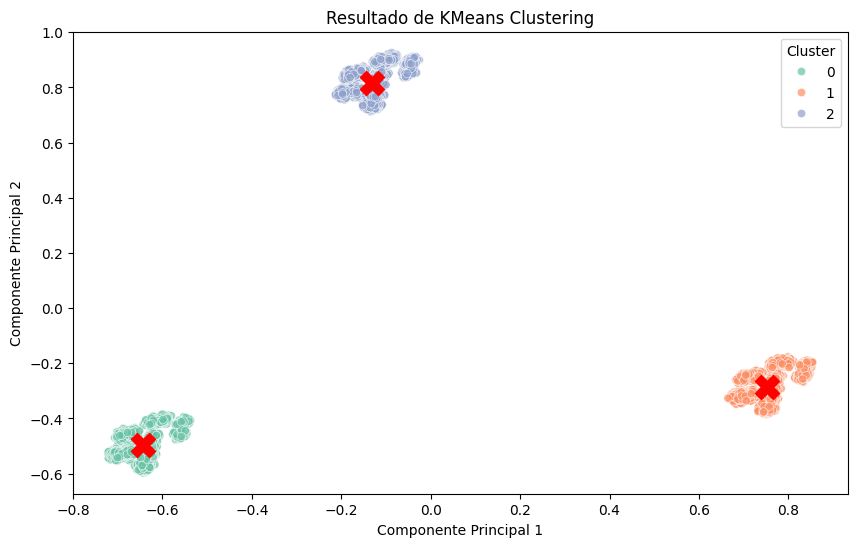

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette="Set2", alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
plt.title("Resultado de KMeans Clustering")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()